# Date: 2019-04-30 to 2019-05-13

In [1]:
import os
import gc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = '/home/phongdk/data_user_income_targeting/score/score.gz'
df = pd.read_csv(filename, dtype={'user_id':str, 'work_station':int, 'payment_score':int}, index_col='user_id', nrows=None)
df.shape

(7722179, 16)

In [3]:
df.head()

,work_station,payment_score,gender_score,age_score,device_score,address_score,travel_score,airline_score,luxury_score,resort_score,hotel_score,tour_score,shopping_score,booking,total_score,income
user_id,,,,,,,,,,,,,,,,
E64E253D-14F1-41C1-98BB-736125CAED0F.DFNzoaLgySir8oAnzxZvDg..,0,0,4.0,1.0,3.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,12.0,1
0F20B1F3-25DA-4277-8E9E-803C33D53A37.bVbc0ln_Z5YJZ8RTScRYew..,0,0,5.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,9.5,1
4632AE6C-AF8E-4A8D-90D2-1C37AFBD46F7.G8cpdahzuRSOGKoeqciDAQ..,1,0,5.0,4.5,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,12.5,1
a20f7e9a-ed35-432b-aee4-0f9c5b3024e4.Ig0vVl7FfbP_VCeLg9nRHw..,0,0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,10.0,1
573208DF-C2AE-4724-84A6-00BD747650E4.op9w2ATLfiB1be8UNVj3Fg..,0,0,4.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,10.0,1


In [4]:
score_columns = [x for x in df.columns if "score" in x ]

In [5]:
# gs = gridspec.GridSpec(nrows=4, ncols=2)
# plt.figure(figsize=(30,40))
# for r in range(4):
#     for c in range(2):
#         plt.subplot(gs[r,c])
#         col = column_name[r * 2 + c]
#         sns.distplot(df[col])
#         plt.title(col)

In [5]:
def get_value_counts(df):
    for col in df.columns:
        print(col, "---------------------")
        print(df[col].value_counts(sort=False).sort_index(ascending=True))

# Count frequency for each column

In [7]:
# get_value_counts(df)

In [8]:
# def filter_agency():
    

In [9]:
# booking_columns = ['airline_score', 'resort_score', 'hotel_score', 'tour_score']
# df['booking'] = (df[booking_columns].sum(axis=1)) > 0
# df['total_score'] = df[score_columns].sum(axis=1)
df.head()

,work_station,payment_score,gender_score,age_score,device_score,address_score,travel_score,airline_score,luxury_score,resort_score,hotel_score,tour_score,shopping_score,booking,total_score,income
user_id,,,,,,,,,,,,,,,,
E64E253D-14F1-41C1-98BB-736125CAED0F.DFNzoaLgySir8oAnzxZvDg..,0,0,4.0,1.0,3.5,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,12.0,1
0F20B1F3-25DA-4277-8E9E-803C33D53A37.bVbc0ln_Z5YJZ8RTScRYew..,0,0,5.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,9.5,1
4632AE6C-AF8E-4A8D-90D2-1C37AFBD46F7.G8cpdahzuRSOGKoeqciDAQ..,1,0,5.0,4.5,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,12.5,1
a20f7e9a-ed35-432b-aee4-0f9c5b3024e4.Ig0vVl7FfbP_VCeLg9nRHw..,0,0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,10.0,1
573208DF-C2AE-4724-84A6-00BD747650E4.op9w2ATLfiB1be8UNVj3Fg..,0,0,4.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,10.0,1


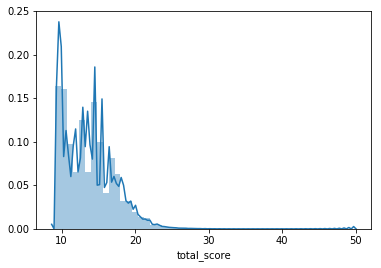

In [6]:
sns.distplot(df['total_score'])

In [9]:
# condition = ~((df['work_station']) & (df['booking']) & (~df['payment_score']))
condition = ~((df['work_station'] > 0) & (df['booking']) & (df['payment_score'] == 0))
condition = condition & (df['total_score'] > 0)

In [7]:
def get_milestone_income(income_arr):
    LUXURY_SCORE = np.percentile(income_arr, 92)
    HIGH_INCOME_SOCRE = np.percentile(income_arr, 80)
    MEDIUM_INCOME_SCORE = np.percentile(income_arr, 35)
    return [MEDIUM_INCOME_SCORE, HIGH_INCOME_SOCRE, LUXURY_SCORE]

In [10]:
income_milestones = get_milestone_income(df[condition]['total_score'])
print(income_milestones)

[12.0, 16.5, 18.666666666666664]


In [11]:
def classify_income(x, income_milestones):
    for (i, income) in enumerate(income_milestones):
        if (x < income):
            return i
    return len(income_milestones)

In [12]:
df['income'] = df['total_score'].apply(lambda x: classify_income(x, income_milestones))
df[~condition]['income'] = 0

In [15]:
df['income'].value_counts()

1    3384055
0    2643313
2    1075324
3     619487
Name: income, dtype: int64

In [17]:
print("MEDIUM_INCOME_SCORE : {} \nHIGH_INCOME_SOCRE: {} \nLUXURY_SCORE: {}".format(*income_milestones))

MEDIUM_INCOME_SCORE : 12.0 
HIGH_INCOME_SOCRE: 16.5 
LUXURY_SCORE: 18.666666666666664


In [18]:
df['income']

user_id
E64E253D-14F1-41C1-98BB-736125CAED0F.DFNzoaLgySir8oAnzxZvDg..    1
0F20B1F3-25DA-4277-8E9E-803C33D53A37.bVbc0ln_Z5YJZ8RTScRYew..    0
4632AE6C-AF8E-4A8D-90D2-1C37AFBD46F7.G8cpdahzuRSOGKoeqciDAQ..    1
a20f7e9a-ed35-432b-aee4-0f9c5b3024e4.Ig0vVl7FfbP_VCeLg9nRHw..    0
573208DF-C2AE-4724-84A6-00BD747650E4.op9w2ATLfiB1be8UNVj3Fg..    0
43E95F55-1103-4001-9537-B71BBB633A93.768FuYUs6qbNWZHhclshwA..    1
db6ff86c-1021-4cea-b3cc-9dc769441199.rOTroxcYWOUhMfw2lGfwZQ..    1
FF3639DA-ED83-4280-B597-195F5FA63CBD.DIi-2pA44r0zHl57_GtaGg..    1
BF3DF20F-856C-401F-BC3C-D619A446A89A.jUu3dc5z2NKGIqO-0M7eDA..    1
EE649F95-9D97-41B6-A02D-C70019F5A33A.cQ9D6YqUEuuMaYuJM0Alhg..    0
453CC6F6-1410-43C3-A2F4-17F93128403E.2a3wGJ6gg_V4r3Y9Baa4NA..    0
63E25A67-315B-49BA-92AE-EA0EBAE75311.iuz5W-jAx7GCePL31o-Y_Q..    3
70F26A34-5373-4DC0-ADD4-7A0FB87708D1.IinpI_sOlKzhRYORbHLBLQ..    0
AD32D8FD-823C-41E2-8256-3A1019430575.rYm_WOf33q9nRujYrc2mKA..    0
0F20B1F3-25DA-4277-8E9E-803C33D53A37.E7el-UJ_vWey6p0um

# Distribution on total_score
### Lots of users with low score <=5

In [19]:
df[df['total_score'] == 0]

,work_station,payment_score,gender_score,age_score,device_score,address_score,travel_score,airline_score,luxury_score,resort_score,hotel_score,tour_score,shopping_score,booking,total_score,income
user_id,,,,,,,,,,,,,,,,


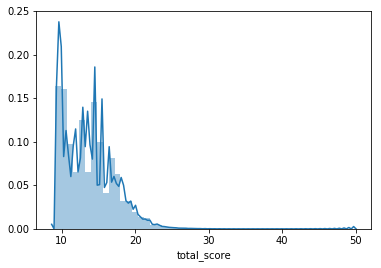

In [20]:
sns.distplot(df['total_score'])

# Check value counts for all users with total_score < 5
- Gender: Unknown
- Age: Unknown
- Other Properties: Almost score 0.0

In [21]:
# get_value_counts(df[df['total_score'] < 5])

# Check value counts for all users with total_score >= 5

In [22]:
# get_value_counts(df[df['total_score'] >= 5])

# Now, check the distribution of users with total_score >=5

## It skew to the left with a long right tail

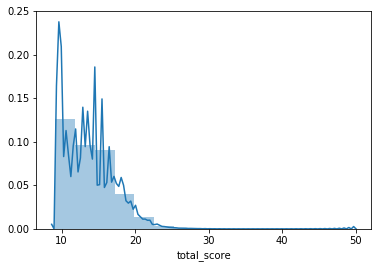

In [23]:
sns.distplot(df[df['total_score'] >= 5]['total_score'], bins=15, hist=True, kde=True)

# Check value counts for all users with total_score >20
- Gender: identify
- Age: 5 score means 26-55 age
- Other Properties: 

In [24]:
# get_value_counts(df[df['total_score'] > 20])

# Check users with total score >30

In [25]:
df[df['total_score'] > 30].sort_values(by=['total_score'], ascending=False)

,work_station,payment_score,gender_score,age_score,device_score,address_score,travel_score,airline_score,luxury_score,resort_score,hotel_score,tour_score,shopping_score,booking,total_score,income
user_id,,,,,,,,,,,,,,,,
D7428079-EB0E-43D1-AB8D-B45B50CD00B7.Z0O8iHSgzKSpLLX4Gf6eOw..,1,5,4.0,4.5,3.5,5.000000,0.0,5.0,5.0,3.8,5.0,5.0,3.8,True,49.600000,3
260B0D8A-0401-4CD2-B0DE-02683545AACA.kXGfa9d0K6lL1ixi-uFxHQ..,0,5,5.0,2.0,3.5,3.166667,5.0,5.0,3.8,0.0,5.0,5.0,5.0,True,47.466667,3
50818FB8-A69F-49CF-98C8-04818B3ABA16.Rf-1EMASE5zQLi1bRWbOeg..,1,5,4.0,4.5,5.0,3.000000,4.0,5.0,0.0,2.0,3.8,5.0,5.0,True,46.300000,3
B87CB07D-5F89-4562-9E52-4B612E4D97B8.2DdNsbqsFpUxcj140eJp7g..,1,5,4.0,4.5,5.0,5.000000,0.0,5.0,2.0,0.0,5.0,5.0,5.0,True,45.500000,3
8407BC1E-512A-4578-8077-9A219A90A4E3.7undYsx1udKvwDQeMx3Z1g..,1,5,4.0,4.5,3.5,3.666667,5.0,5.0,5.0,0.0,2.0,2.0,5.0,True,44.666667,3
CC6A1BB2-BB53-4B77-B018-7F300ED0591A.bV2XdIgTG_QMOl4lMlJL8g..,1,5,5.0,4.5,5.0,5.000000,4.0,5.0,1.0,0.0,5.0,0.0,5.0,True,44.500000,3
E833D700-F9A1-48CD-AF1A-7B14137221C9.XynTHNX7eTKM_DzNUfFXHQ..,1,5,4.0,4.5,5.0,5.000000,0.0,5.0,2.0,5.0,5.0,0.0,3.8,True,44.300000,3
EA0E9F64-9055-4783-87C3-A798101AD173.lQWFlLTxNMMsqT85MDIWqw..,0,5,5.0,4.5,3.5,2.333333,5.0,2.0,0.0,3.8,3.8,3.8,5.0,True,43.733333,3
18FA2DD0-3145-4AC1-8053-CAADF7C6C50F.0rdedqN7aZaai0JbGvyZeA..,0,0,5.0,4.5,5.0,3.166667,5.0,5.0,1.0,0.0,5.0,5.0,5.0,True,43.666667,3


### Percentage of usres who have total_score > 20

In [ ]:
len(df[df['total_score'] > 20]) / len(df) * 100

### Percentage of usres who havetotal_score > 15

In [ ]:
len(df[df['total_score'] > 15]) / len(df) * 100

# Check users with smart phone

In [ ]:
df_smart_phone = df[(df['os_name_score'] == 3) | (df['os_name_score'] == 3.5) | (df['os_name_score'] == 4.5)]

In [ ]:
get_value_counts(df_smart_phone)

In [ ]:
sns.distplot(df_smart_phone[df_smart_phone['total_score'] >= 5]['total_score'], bins=15, hist=True, kde=True)

In [ ]:
print(100.0 * len(df_smart_phone[df_smart_phone['total_score'] > 15]) / len(df_smart_phone[df_smart_phone['total_score'] >=5]))

# Statistic Test

In [ ]:
x_label_income = ['Low', 'Medium', 'High', 'Luxury']

In [ ]:
income_Bachan = [2532818, 1506937, 259549, 4562]

In [ ]:
# income_Bachan_prop = income_Bachan / np.sum(income_Bachan)
# income_Bachan_prop

In [ ]:
# income_Bachan_accumulate_prop = np.cumsum(income_Bachan_prop)
# print(income_Bachan_accumulate_prop)

In [ ]:
sns.barplot(x=x_label_income, y=income_Bachan)

In [ ]:
df_total_score = df.copy()
df_total_score.head()

#  Test statistics ( Chi-square statistics on two observed methods)
- Since the number users on Bachan ~ 5M, our method ~18M, so the test is not correct in my opinion.
- Perhaps we need to use similar number users for both methods, no need to be the same but not too different

In [ ]:
threshold_income = [9.5, 13, 15.5]

In [ ]:
def get_income_category(x):
    # 0: low, 1: mid, 2: high, 3: so rich (luxury)
    for (i, t) in enumerate(threshold_income):
        if (x < t):
            return i
    return len(threshold_income)

In [ ]:
df_total_score['income'] = df_total_score['total_score'].apply(lambda x: get_income_category(x))

In [ ]:
df_total_score = df_total_score[['total_score', 'income']]
df_total_score.head()

In [ ]:
# income_prop = df_total_score['income'].value_counts(normalize=True, sort=False)
# print(income_prop)
# income_accumulate_prop = np.cumsum(income_prop.values)

In [ ]:
# def get_Kolmogorov_Smirnov_Statistic(first_accumulate_prop, second_accumulate_prob):
#     critical_value = 1.36 * 1 / np.sqrt(len(first_accumulate_prop))
#     gap = abs(first_accumulate_prop - second_accumulate_prob)
#     max_gap = np.max(gap)
#     print('critical value: {} \t Max gap: {}'.format(critical_value, max_gap))
#     return max_gap < critical_value

In [ ]:
# get_Kolmogorov_Smirnov_Statistic(income_Bachan_accumulate_prop, income_accumulate_prop)

In [ ]:
income_our_method = df_total_score['income'].value_counts(sort=False)
income_our_method

In [ ]:
sns.barplot(x=x_label_income, y=income_our_method)
plt.ylabel('Count')

In [ ]:
arr_test = np.array([[11,5,1], [8, 6, 8], [3, 10, 12]])
df_test = pd.DataFrame(index=['ER', 'LR', 'BQ'], columns=['Fruit', 'Flower', 'Mixed'], data=arr_test)

In [ ]:
df_test

In [ ]:
from scipy import stats

In [ ]:
def chi_square_test(df):
    marginal_count_method = df.sum(axis=1)
    marginal_count_income = df.sum(axis=0)
    total_count = marginal_count_method.sum()
    assert total_count == marginal_count_income.sum()
    #print('total count', total_count)
    expected_values = np.zeros_like(df, dtype=float)
    for i in range(expected_values.shape[0]):
        for j in range(expected_values.shape[1]):
            expected_values[i,j] = marginal_count_method[i] * marginal_count_income[j] / total_count
    df_expected = pd.DataFrame(index=df.index, columns=df.columns, data=expected_values)
    print(df_expected)
    chi_square = ((df - df_expected)**2 / df_expected).sum().sum()
    degree_of_freedom = (expected_values.shape[0] - 1 ) * (expected_values.shape[1] - 1)
    print('Chi_square : {} '.format(chi_square))
    print('Degree of freedom : {}'.format(degree_of_freedom))
    p_values = 1 - stats.chi2.cdf(chi_square, degree_of_freedom)
    print('p_value:', p_values)
    return p_values,4

In [ ]:
chi_square_test(df_test)

### p_value < 0.05 --> (ER, LR, BQ) and (Fruit, Flower, Mixed) are dependent

In [ ]:
df_two_methods = pd.DataFrame(index=['Bachan', 'Our method'], columns=x_label_income, data=np.array([income_Bachan, income_our_method]))

In [ ]:
df_two_methods

In [ ]:
p_value = chi_square_test(df_two_methods)

# Check statistics with proportion instead of counting number
- It is wrong since this statistics test only for the counting number

In [ ]:
income_Bachan_prop = income_Bachan / np.sum(income_Bachan)
income_our_method_prop = df_total_score['income'].value_counts(normalize=True, sort=False).values

In [ ]:
income_Bachan_prop

In [ ]:
income_our_method_prop

In [ ]:
df_two_methods_prop = pd.DataFrame(index=['Bachan', 'Our method'], columns=x_label_income, 
                                   data=np.array([income_Bachan_prop, income_our_method_prop]))

In [ ]:
df_two_methods_prop

In [ ]:
chi_square_test(df_two_methods_prop)